## Estimating the area of the Mandelbrot set using Monte Carlo integration

In [47]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

import mandelbrot

### Fractal

In [48]:
# Sampling area defined by its edges
area = [-2, 0.75, -1, 1]
mandel_set = mandelbrot.mandel(area)

In [49]:
spacing = 0.005
max_iter = 100

xx, yy = mandel_set.grid(spacing)
plane = mandel_set.generate_fractal(max_iter, spacing)

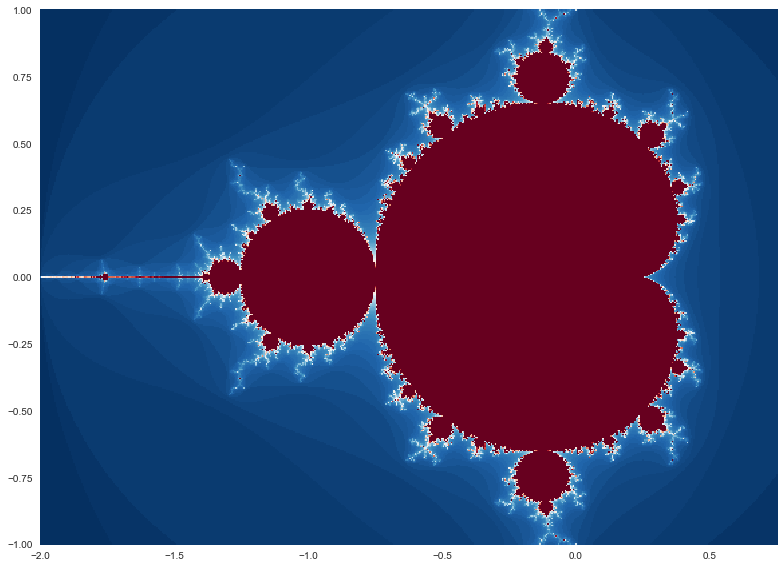

In [50]:
fig = plt.figure(figsize = (11, 8))
ax = plt.gca()
pc = ax.pcolormesh(xx, yy, plane, cmap=plt.cm.get_cmap('RdBu'))
plt.tight_layout()
plt.savefig('fractal.pdf')
plt.show()

### Varying the number of iterations or samplepoints (uniform sampling)

In [38]:
# Sampling area defined by its edges
area = [-2, 2, -2, 2]
mandel_set = mandelbrot.mandel(area)

#### Iterations

In [39]:
n_samples = 1000
iterations = np.logspace(1, 15, 15, base = 2)

In [40]:
area_iter = []
for i in iterations:
    np.random.seed(0)
    area_iter.append(mandel_set.est_area(s, int(i), 'uniform'))

#### Sample points

In [41]:
runs = 100
max_iter = 500
n_samples = np.logspace(3, 12, 10, base = 2)

In [42]:
area_sample = []
sample_var = []
for s in n_samples:
    np.random.seed(0)
    calculation = mandel_set.avg_est_area(runs, int(s), max_iter, 'uniform')
    area_sample.append(calculation[0])
    sample_var.append(calculation[1])

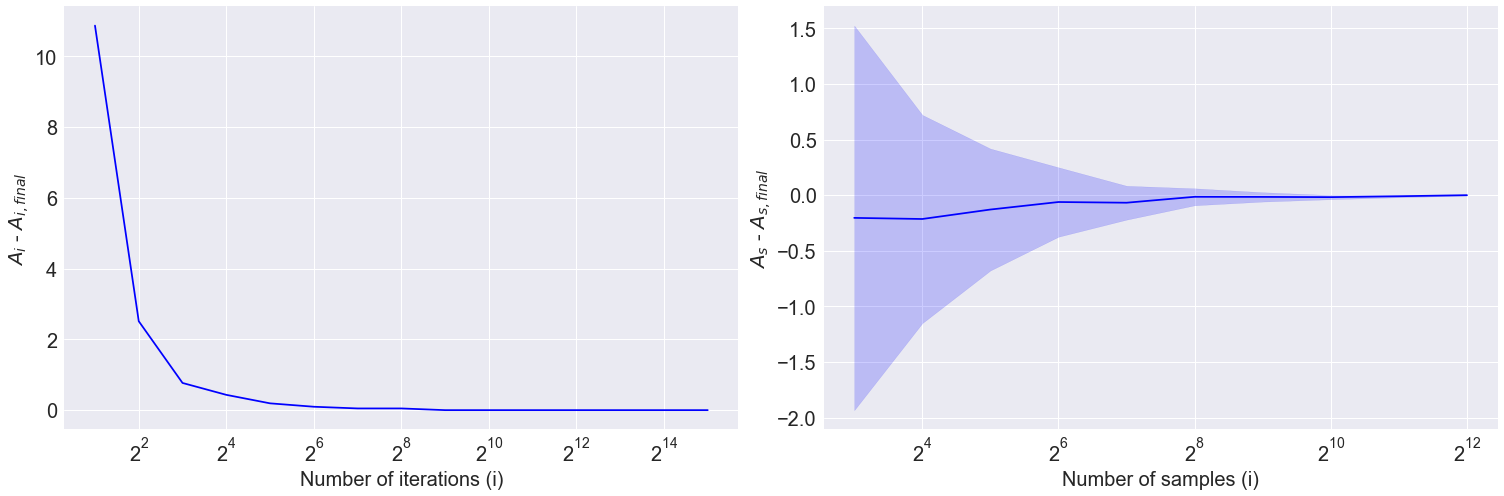

In [46]:
#Estimated area as a function of the number of iterations/sample points for uniform sampling
plt.style.use('seaborn')

fig, axs = plt.subplots(1, 2, figsize = (21, 7))

axs[0].tick_params(axis = 'both', labelsize = 20)
axs[1].tick_params(axis = 'both', labelsize = 20)

axs[0].semilogx(iterations, np.array(area_iter) - area_iter[-1], base = 2, color = 'blue')
axs[0].set_xlabel('Number of iterations (i)', fontsize = 20)
axs[0].set_ylabel('$A_i$ - $A_{i,final}$', fontsize = 20)
axs[1].semilogx(n_samples, np.array(area_sample) - area_sample[-1], base = 2, color = 'blue')
axs[1].fill_between(n_samples, np.array(area_sample) - area_sample[-1] - np.array(sample_var), np.array(area_sample) - area_sample[-1] + np.array(sample_var), color = 'blue', alpha = 0.2)
axs[1].set_xlabel('Number of samples (i)', fontsize = 20)
axs[1].set_ylabel('$A_s$ - $A_{s,final}$', fontsize = 20)

plt.tight_layout()
plt.savefig('Mandel_varying_i_and_s.pdf')
plt.show()

### Effect of stratified sampling

In [71]:
runs = 100
max_iter = 500
n_samples = np.logspace(4, 12, 9, base = 2)

#### Uniform sampling

In [62]:
# List to store the average Mandelbrot set area and the sample variance
avg_area_uniform = []
sample_var_uniform = []

for s in n_samples:
    np.random.seed(0)
    calculation = mandel_set.avg_est_area(runs, int(s), max_iter, 'uniform')
    avg_area_uniform.append(calculation[0])
    sample_var_uniform.append(calculation[1])

#### Latin hypercube sampling

In [63]:
# List to store the average Mandelbrot set area and the sample variance
avg_area_lhs = []
sample_var_lhs = []

for s in n_samples:
    np.random.seed(0)
    calculation = mandel_set.avg_est_area(runs, int(s), max_iter, 'latin_hypercube')
    avg_area_lhs.append(calculation[0])
    sample_var_lhs.append(calculation[1])

#### Orthogonal sampling

In [69]:
# Only samplesizes with integer square root
n_samples2 = np.logspace(2, 6, 5, base = 4)

# List to store the average Mandelbrot set area and the sample variance
avg_area_ortho = []
sample_var_ortho = []

for s in n_samples2:
    np.random.seed(0)
    calculation = mandel_set.avg_est_area(runs, int(s), max_iter, 'orthogonal')
    avg_area_ortho.append(calculation[0])
    sample_var_ortho.append(calculation[1])

#### Plot

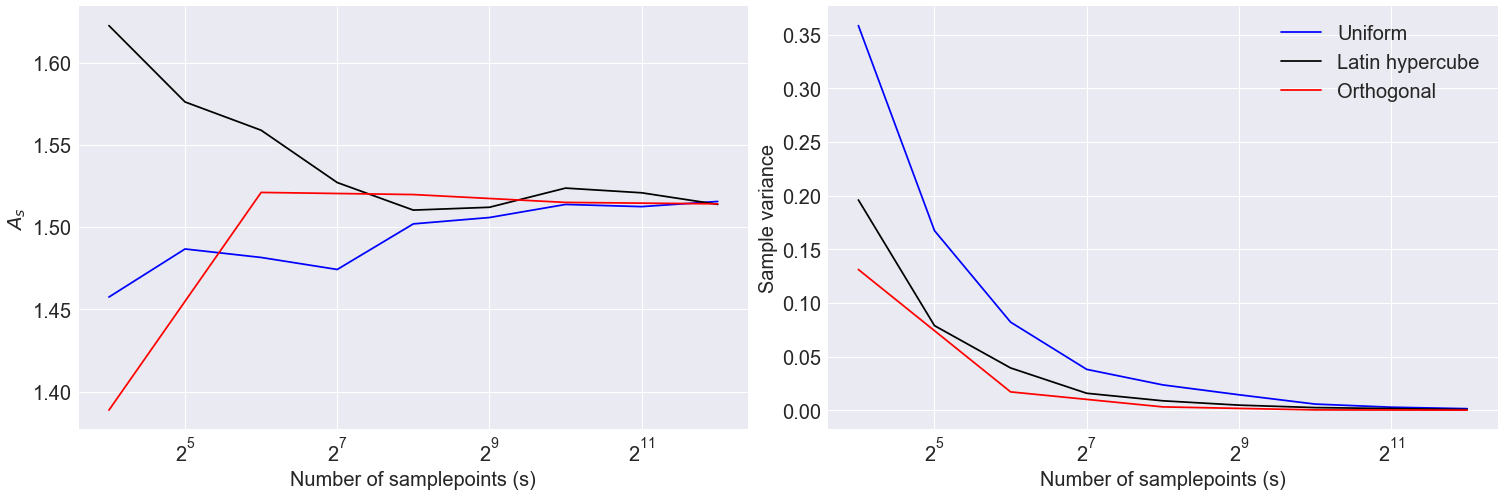

In [122]:
fig, axs = plt.subplots(1, 2, figsize = (21, 7))

axs[0].tick_params(axis = 'both', labelsize = 20)
axs[1].tick_params(axis = 'both', labelsize = 20)

axs[0].semilogx(n_samples, np.array(avg_area_uniform), base = 2, color = 'blue', label = 'Uniform')
axs[0].semilogx(n_samples, np.array(avg_area_lhs), base = 2, color = 'black', label = 'Latin hypercube')
axs[0].semilogx(n_samples2, np.array(avg_area_ortho), base = 2, color = 'red', label = 'Orthogonal')
axs[0].set_xlabel('Number of samplepoints (s)', fontsize = 20)
axs[0].set_ylabel('$A_s$', fontsize = 20)

axs[1].semilogx(n_samples, np.array(sample_var_uniform), base = 2, color = 'blue', label = 'Uniform')
axs[1].semilogx(n_samples, np.array(sample_var_lhs), base = 2, color = 'black', label = 'Latin hypercube')
axs[1].semilogx(n_samples2, np.array(sample_var_ortho), base = 2, color = 'red', label = 'Orthogonal')
axs[1].set_xlabel('Number of samplepoints (s)', fontsize = 20)
axs[1].set_ylabel('Sample variance', fontsize = 20)
axs[1].legend(fontsize = 20)

plt.tight_layout()
plt.savefig('stratified_sampling.pdf')
plt.show()

#### F-test

In [114]:
F_crit = []

F_uniform_lhs = []
F_lhs_ortho = []

for i in range(len(sample_var_uniform)):
    F_uniform_lhs.append(sample_var_uniform[i] / sample_var_lhs[i])
    F_crit.append(scipy.stats.f.ppf(0.95, 99, 99))

for i in range(len(sample_var_ortho)):
    F_lhs_ortho.append(sample_var_lhs[i*2] / sample_var_ortho[i])

#### T-test

In [129]:
# List to store the average Mandelbrot set area and the sample variance
avg_area_uniform = dict()

for s in n_samples:
    np.random.seed(0)
    avg_area_uniform['%s'%s] = []
    for i in range(runs):
        avg_area_uniform['%s'%s].append(mandel_set.est_area(int(s), max_iter, 'uniform'))

In [130]:
# List to store the average Mandelbrot set area and the sample variance
avg_area_lhs = dict()

for s in n_samples:
    np.random.seed(0)
    avg_area_lhs['%s'%s] = []
    for i in range(runs):
        avg_area_lhs['%s'%s].append(mandel_set.est_area(int(s), max_iter, 'latin_hypercube'))

In [132]:
# List to store the average Mandelbrot set area and the sample variance
avg_area_ortho = dict()

for s in n_samples2:
    np.random.seed(0)
    avg_area_ortho['%s'%s] = []
    for i in range(runs):
        avg_area_ortho['%s'%s].append(mandel_set.est_area(int(s), max_iter, 'orthogonal'))

In [156]:
p_crit = []

p_uniform_lhs = []
p_lhs_ortho = []

for s in n_samples:
    p_uniform_lhs.append(stats.ttest_ind(avg_area_uniform['%s'%s], avg_area_lhs['%s'%s], equal_var = False)[1])
    p_crit.append(0.05)

for s in n_samples2:
    p_lhs_ortho.append(stats.ttest_ind(avg_area_lhs['%s'%s], avg_area_ortho['%s'%s], equal_var = False)[1])

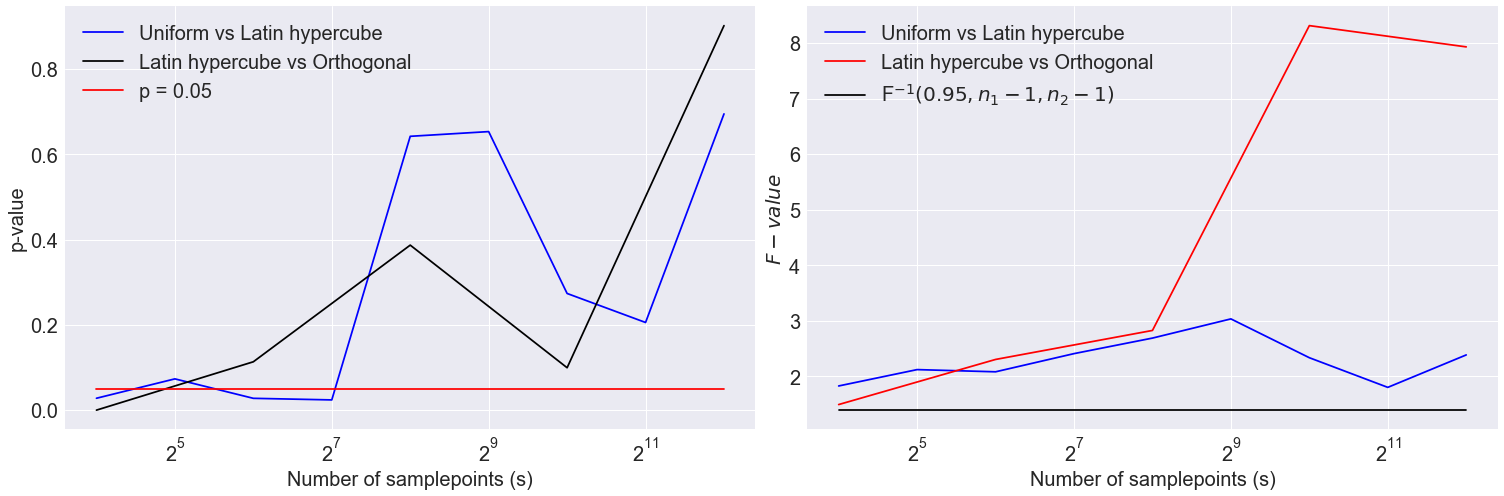

In [160]:
plt.style.use('seaborn')

fig, axs = plt.subplots(1, 2, figsize = (21, 7))

axs[0].tick_params(axis = 'both', labelsize = 20)
axs[1].tick_params(axis = 'both', labelsize = 20)

axs[0].semilogx(n_samples, p_uniform_lhs, base = 2, color = 'blue', label = 'Uniform vs Latin hypercube')
axs[0].semilogx(n_samples2, p_lhs_ortho, base = 2, color = 'black', label = 'Latin hypercube vs Orthogonal')
axs[0].semilogx(n_samples, p_crit, base = 2, color = 'red', label = 'p = 0.05')
axs[0].set_xlabel('Number of samplepoints (s)', fontsize = 20)
axs[0].set_ylabel('p-value', fontsize = 20)
axs[0].legend(fontsize = 20)

axs[1].semilogx(n_samples, F_uniform_lhs, base = 2, color = 'blue', label = 'Uniform vs Latin hypercube')
axs[1].semilogx(n_samples2, F_lhs_ortho, base = 2, color = 'red', label = 'Latin hypercube vs Orthogonal')
axs[1].semilogx(n_samples,F_crit, base = 2, color = 'black', label = 'F$^{-1}(0.95, n_1 - 1, n_2 - 1)$')
axs[1].set_xlabel('Number of samplepoints (s)', fontsize = 20)
axs[1].set_ylabel('$F-value$', fontsize = 20)
axs[1].legend(fontsize = 20)

plt.tight_layout()
plt.savefig('stratified_stats.pdf')
plt.show()

### Effect of strategic sampling

In [176]:
# Total sampling area
area = [-2, 2, -2, 2]

# Number of iterations and sampling points
max_iter = 400
start_samples = 256

runs = 100 # Number of simulations
cycles = 6 # Number of improvement cycles
starting_subdivisions = 16
subdivisions = 4

np.random.seed(1337)

#### Strategic sampling 

In [177]:
col_est_areas_ss = np.zeros((runs,cycles))

for j in range(runs):
    
    # Divide the sampling area in 16 subareas
    subspaces = mandelbrot.subarea(area, max_iter, 1)
    subspaces = subspaces.subdivide(starting_subdivisions)
    
    samplepoints_ss = []
    est_areas = []
    previous_cumm_samples = 0
    
    # Improve sampling locations 6 times
    for n in range(cycles):

        prob_decr = 0           # Total probability decrease over all the subareas
        n_areas_incr = 0        # Number of subareas for which the probability should increase
        total_mandel_area = 0
        points = np.empty(0)
        loc_samples = start_samples* (2**n)
        
        for subspace in subspaces:

            # Determine number of samples in subarea
            n_samples = max(int(subspace.probability * loc_samples), 1)
            
            # Calculate the mandelbrot area in the subarea
            mandel_area = subspace.mandel.est_area(n_samples, subspace.iterations, method = 'latin_hypercube', store_samples = True)
            samples = subspace.mandel.samples
            total_mandel_area += mandel_area

            # Store the samplepoints
            if len(points) == 0:
                points = samples
            else:
                points = np.concatenate((points, samples))


            if mandel_area == 0:
                # Areas outside of the Mandelbrot set
                subspace.probability /= 2
                prob_decr += subspace.probability

            elif mandel_area == subspace.mandel.area:
                # Areas inside of the Mandelbrot set
                subspace.probability /= 2
                prob_decr += subspace.probability
                # Lower the number of iterations
                subspace.iterations = 200

            else:
                # Areas on the edge of the Mandelbrot set 
                subspace.prob_incr = True
                n_areas_incr += 1
                
        # Increase the probability of the important areas
        add_prob = prob_decr / n_areas_incr
        new_subspaces = []

        for subspace in subspaces:
            if subspace.prob_incr == True:
                subspace.probability += add_prob
                subspace.prob_incr = False

            # Subdivide the areas every other iteration
            if n % 2 == 0:
                new_subareas = subspace.subdivide(subdivisions)
                new_subspaces += new_subareas

        if n % 2 == 0:
            subspaces = new_subspaces

        # Store the all the sampling points in this iteration
        samplepoints_ss.append(points)
        # Store the estimated area
        if previous_cumm_samples == 0:
            est_areas.append(total_mandel_area)
            previous_cumm_samples = loc_samples
        else:
            all_used_samples = previous_cumm_samples + loc_samples
            est_areas.append(est_areas[-1]*(previous_cumm_samples/all_used_samples) + total_mandel_area*(loc_samples/all_used_samples))
            previous_cumm_samples = all_used_samples
    
    col_est_areas_ss[j] = est_areas

#### Orthogonal sampling

In [179]:
sampling_points_ortho = [16,28,43,62,90,127]

# No subdividing in subareas
starting_subdivisions = 1
subdivisions = 1

np.random.seed(1337)

In [181]:
col_est_areas_ortho = np.zeros((runs,cycles))

for j in range(runs):
    subspaces = mandelbrot.subarea(area, max_iter, 1)
    subspaces = subspaces.subdivide(starting_subdivisions)
    
    samplepoints_ortho = []
    est_areas = []
    
    # Improve sampling locations 6 times
    for n in range(cycles):

        prob_decr = 0           # Total probability decrease over all the subareas
        n_areas_incr = 0        # Number of subareas for which the probability should increase
        total_mandel_area = 0
        points = np.empty(0)
        loc_samples = sampling_points_ortho[n]**2
        
        for subspace in subspaces:

            # Determine number of samples in subarea
            n_samples = max(int(subspace.probability * loc_samples), 1)
            # Calculate the mandelbrot area in the subarea
            mandel_area = subspace.mandel.est_area(n_samples, subspace.iterations, method = 'orthogonal', store_samples = True)
            samples = subspace.mandel.samples
            total_mandel_area += mandel_area

            # Store the samplepoints
            if len(points) == 0:
                points = samples
            else:
                points = np.concatenate((points, samples))
                
        # Store the all the sampling points in this iteration
        samplepoints_ortho.append(points)
        # Store the estimated area
        est_areas.append(total_mandel_area)
    
    col_est_areas_ortho[j] = est_areas

#### Latin hypercube

In [182]:
np.random.seed(1337)

col_est_areas_lhs = np.zeros((runs,cycles))

for j in range(runs):
    subspaces = mandelbrot.subarea(area, max_iter, 1)
    subspaces = subspaces.subdivide(starting_subdivisions)
    
    samplepoints_lhs = []
    est_areas = []
    
    # Improve sampling locations 6 times
    for n in range(cycles):

        prob_decr = 0           # Total probability decrease over all the subareas
        n_areas_incr = 0        # Number of subareas for which the probability should increase
        total_mandel_area = 0
        points = np.empty(0)
        loc_samples = sampling_points_ortho[n]**2
        
        for subspace in subspaces:

            # Determine number of samples in subarea
            n_samples = max(int(subspace.probability * loc_samples), 1)
            # Calculate the mandelbrot area in the subarea
            mandel_area = subspace.mandel.est_area(n_samples, subspace.iterations, method = 'latin_hypercube', store_samples = True)
            samples = subspace.mandel.samples
            total_mandel_area += mandel_area

            # Store the samplepoints
            if len(points) == 0:
                points = samples
            else:
                points = np.concatenate((points, samples))
                
        # Store the all the sampling points in this iteration
        samplepoints_lhs.append(points)
        # Store the estimated area
        est_areas.append(total_mandel_area)
    
    col_est_areas_lhs[j] = est_areas

#### Statistics

In [220]:
# Numerical value for the 
num_mandelbrot_area = 1.506484
#Mean of the area estimation
mean_area_estimate_ss = np.mean(col_est_areas_ss,axis=0)
mean_area_estimate_ortho = np.mean(col_est_areas_ortho,axis=0)
mean_area_estimate_lhs = np.mean(col_est_areas_lhs,axis=0)

# Standard deviation of area estimation
std_area_estimate_ss = np.std(col_est_areas_ss,axis=0)
std_area_estimate_ortho = np.std(col_est_areas_ortho,axis=0)
std_area_estimate_lhs = np.std(col_est_areas_lhs,axis=0)

# Variance of area estimation
var_area_estimate_ss = np.var(col_est_areas_ss,axis=0)
var_area_estimate_ortho = np.var(col_est_areas_ortho,axis=0)
var_area_estimate_lhs = np.var(col_est_areas_lhs,axis=0)

# Welch's T test created from the slides in the lectures, comparing with orthogonal sampling
welch_t_ortho =abs(mean_area_estimate_ss- mean_area_estimate_ortho)/np.sqrt(var_area_estimate_ss/runs + var_area_estimate_ortho/runs)
welch_df_ortho = np.divide(np.power(var_area_estimate_ss/runs + var_area_estimate_ortho/runs,2),np.power(var_area_estimate_ss/runs,2)/(runs-1) + np.power(var_area_estimate_ortho/runs,2)/(runs-1))
welch_critical_value_ortho = [scipy.stats.t.ppf(q=1-.05,df=loc_welch_df) for loc_welch_df in welch_df_ortho]

# Welch's T test created from the slides in the lectures, comparing with Latin hypercube sampling
welch_t_lhs =abs(mean_area_estimate_ss- mean_area_estimate_lhs)/np.sqrt(var_area_estimate_ss/runs + var_area_estimate_lhs/runs)
welch_df_lhs = np.divide(np.power(var_area_estimate_ss/runs + var_area_estimate_lhs/runs,2),np.power(var_area_estimate_ss/runs,2)/(runs-1) + np.power(var_area_estimate_lhs/runs,2)/(runs-1))
welch_critical_value_lhs = [scipy.stats.t.ppf(q=1-.05,df=loc_welch_df) for loc_welch_df in welch_df_lhs]

# F-test Value comparing with orthogonal sampling
F_ortho = np.divide(var_area_estimate_ss,var_area_estimate_ortho)
# F-test Value comparing with orthogonal sampling
F_lhs = np.divide(var_area_estimate_lhs,var_area_estimate_ss)


#formatting array
x_axis = np.arange(cycles) +1

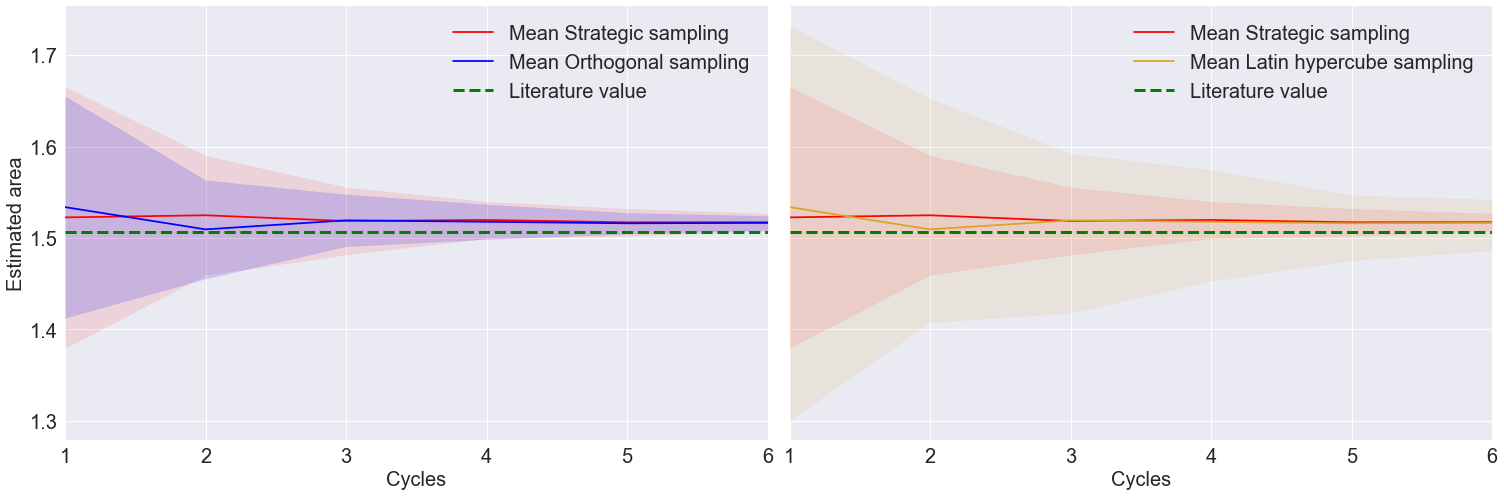

In [232]:
fig, axs = plt.subplots(1, 2, figsize = (21, 7), sharex = True, sharey = True)

axs[0].tick_params(axis = 'both', labelsize = 20)
axs[1].tick_params(axis = 'both', labelsize = 20)

axs[0].plot(x_axis,mean_area_estimate_ss,"red",label ="Mean Strategic sampling")
axs[0].plot(x_axis,mean_area_estimate_ortho,"blue",label ="Mean Orthogonal sampling")
axs[0].fill_between(x_axis,mean_area_estimate_ss - std_area_estimate_ss, mean_area_estimate_ss + std_area_estimate_ss, color='red', alpha=0.1)
axs[0].fill_between(x_axis,mean_area_estimate_ortho - std_area_estimate_ortho, mean_area_estimate_ortho + std_area_estimate_ortho, color='blue', alpha=0.15)
axs[0].axhline(num_mandelbrot_area, color = 'green', label = 'Literature value', linewidth = 3, linestyle = 'dashed')

axs[0].set_xlabel('Cycles', fontsize = 20)
axs[0].set_ylabel('Estimated area', fontsize = 20)
axs[0].legend(fontsize = 20)
axs[0].set_xlim(1,6)

axs[1].plot(x_axis,mean_area_estimate_ss,"red",label ="Mean Strategic sampling")
axs[1].plot(x_axis,mean_area_estimate_ortho,"goldenrod",label ="Mean Latin hypercube sampling")
axs[1].fill_between(x_axis,mean_area_estimate_ss - std_area_estimate_ss, mean_area_estimate_ss + std_area_estimate_ss, color='red', alpha=0.1)
axs[1].fill_between(x_axis,mean_area_estimate_lhs - std_area_estimate_lhs, mean_area_estimate_lhs + std_area_estimate_lhs, color='goldenrod', alpha=0.1)
axs[1].axhline(num_mandelbrot_area, color = 'green', label = 'Literature value', linewidth = 3, linestyle = 'dashed')



axs[1].set_xlabel('Cycles', fontsize = 20)
axs[1].legend(fontsize = 20)
axs[1].set_xlim(1,6)

plt.tight_layout()
plt.savefig('ss_ortho_lhs.pdf')
plt.show()

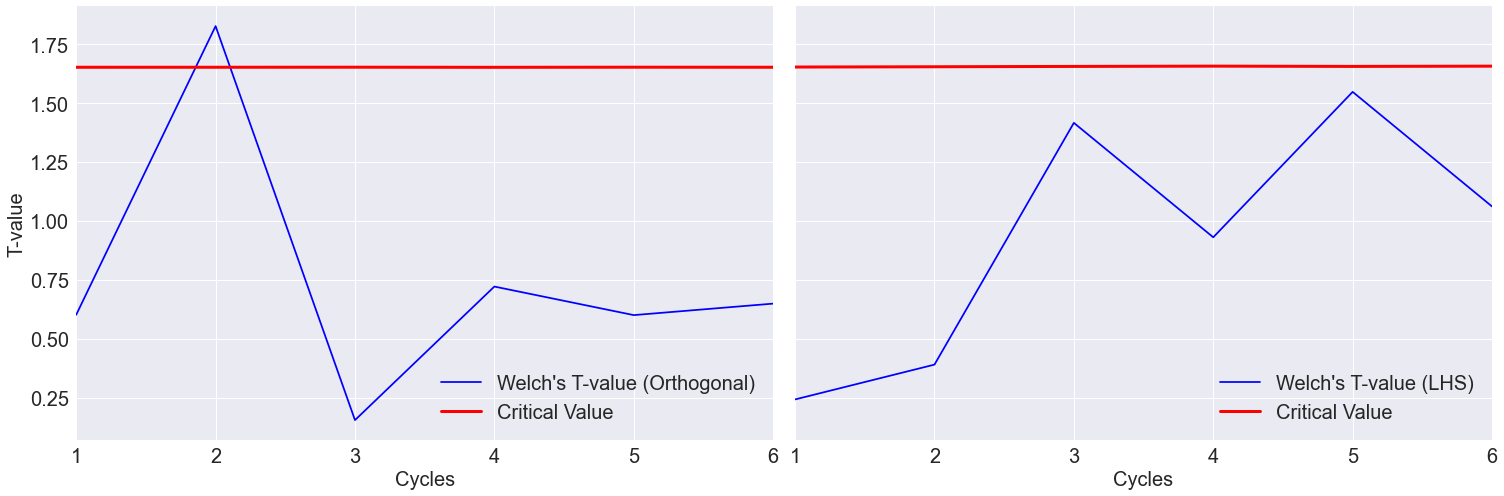

In [217]:
fig, axs = plt.subplots(1, 2, figsize = (21, 7), sharex = True, sharey = True)

axs[0].tick_params(axis = 'both', labelsize = 20)
axs[1].tick_params(axis = 'both', labelsize = 20)

axs[0].plot(x_axis,welch_t_ortho,"blue",label ="Welch's T-value (Orthogonal)")
axs[0].plot(x_axis,welch_critical_value_ortho,"red",linewidth=3,label ="Critical Value")

axs[0].set_xlabel('Cycles', fontsize = 20)
axs[0].set_ylabel('T-value', fontsize = 20)
axs[0].legend(fontsize = 20)
axs[0].set_xlim(1,6)

axs[1].plot(x_axis,welch_t_lhs,"blue",label ="Welch's T-value (LHS)")
axs[1].plot(x_axis,welch_critical_value_lhs,"red",linewidth=3,label ="Critical Value")

axs[1].set_xlabel('Cycles', fontsize = 20)
axs[1].legend(fontsize = 20)
axs[1].set_xlim(1,6)

plt.tight_layout()
plt.savefig('welch_ss.pdf')
plt.show()

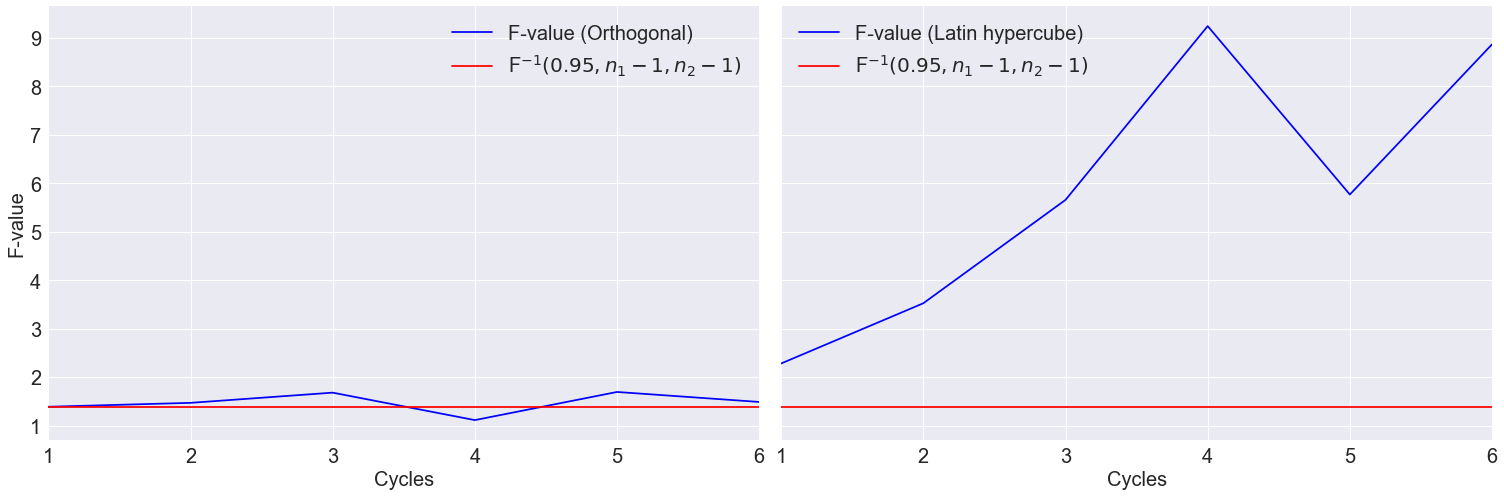

In [246]:
# Plot F-test

fig, axs = plt.subplots(1, 2, figsize = (21, 7), sharex = True, sharey = True)

axs[0].tick_params(axis = 'both', labelsize = 20)
axs[1].tick_params(axis = 'both', labelsize = 20)

axs[0].plot(x_axis, F_ortho,"blue",label ="F-value (Orthogonal)")
axs[0].plot(x_axis, F_crit[:6],"red",label = "F$^{-1}(0.95, n_1 - 1, n_2 - 1)$")

axs[0].set_xlabel('Cycles', fontsize = 20)
axs[0].set_ylabel('F-value', fontsize = 20)
axs[0].legend(fontsize = 20)
axs[0].set_xlim(1,6)

axs[1].plot(x_axis, F_lhs,"blue",label ="F-value (Latin hypercube)")
axs[1].plot(x_axis, F_crit[:6],"red",label = "F$^{-1}(0.95, n_1 - 1, n_2 - 1)$")

axs[1].set_xlabel('Cycles', fontsize = 20)
axs[1].legend(fontsize = 20)
axs[1].set_xlim(1,6)

plt.tight_layout()
plt.savefig('F_test_ss.pdf')
plt.show()

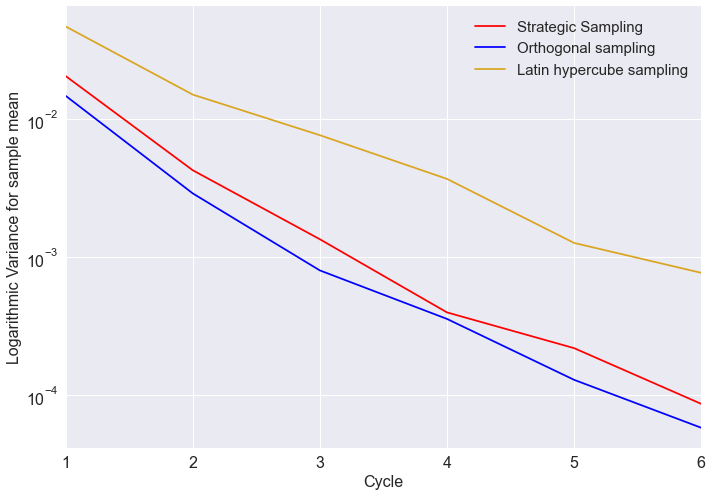

In [260]:
# Plotting the variance

plt.figure(figsize=(10, 7))
plt.semilogy(x_axis,var_area_estimate_ss,"red",label ="Strategic Sampling")
plt.semilogy(x_axis,var_area_estimate_ortho,"blue",label ="Orthogonal sampling")
plt.semilogy(x_axis,var_area_estimate_lhs,"goldenrod",label ="Latin hypercube sampling")
plt.xlim(1,6)
plt.ylabel("Logarithmic Variance for sample mean", fontsize = 16)
plt.xlabel("Cycle", fontsize = 16)
plt.xticks(size = 16)
plt.yticks(size = 16)

plt.legend(fontsize = 15)
plt.tight_layout()
fig.savefig('log_variance.pdf', dpi=300)
plt.show()

### Visualizing sampling points obtained by strategic sampling

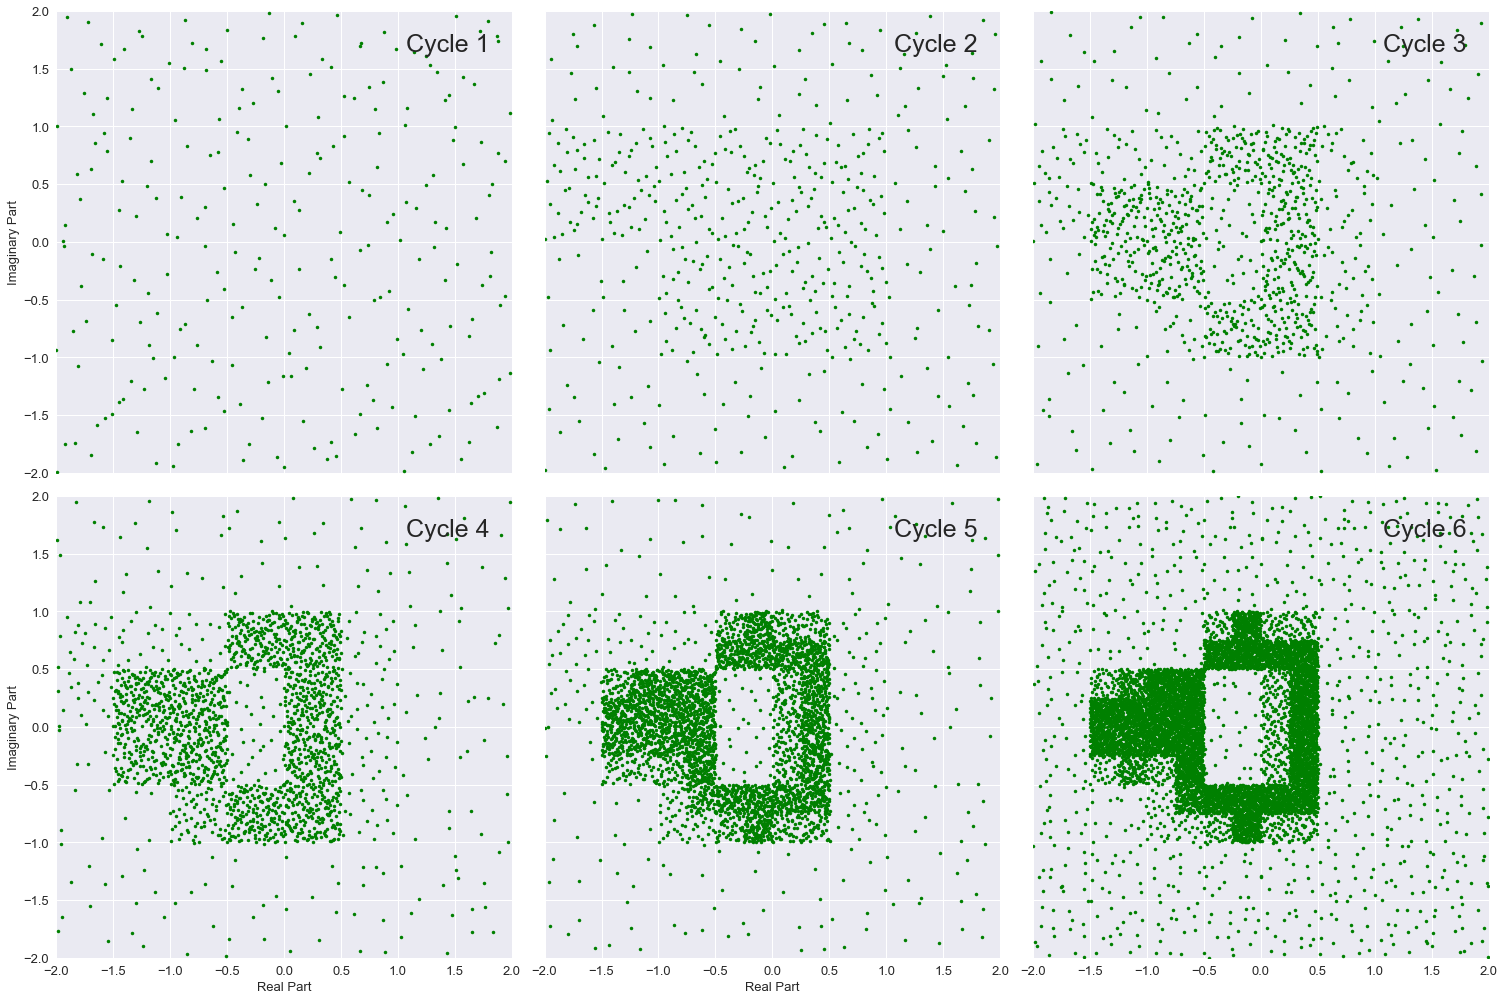

In [299]:
fig, axs = plt.subplots(2, 3, figsize = (21, 14), sharex=True, sharey=True)

axs[0][0].tick_params(axis = 'both', labelsize = 13)
axs[1][0].tick_params(axis = 'both', labelsize = 13)
axs[1][1].tick_params(axis = 'both', labelsize = 13)
axs[1][2].tick_params(axis = 'both', labelsize = 13)

axs[0][0].plot(np.transpose(samplepoints_ss[0])[0],np.transpose(samplepoints_ss[0])[1], "g.",linewidth=0.001, label = 'Cycle 1')
axs[0][0].legend(loc='upper right', fontsize = 25)
axs[0][1].plot(np.transpose(samplepoints_ss[1])[0],np.transpose(samplepoints_ss[1])[1], "g.",linewidth=0.001, label = 'Cycle 2')
axs[0][1].legend(loc='upper right', fontsize = 25)
axs[0][2].plot(np.transpose(samplepoints_ss[2])[0],np.transpose(samplepoints_ss[2])[1], "g.",linewidth=0.001, label = 'Cycle 3')
axs[0][2].legend(loc='upper right', fontsize = 25)
axs[1][0].plot(np.transpose(samplepoints_ss[3])[0],np.transpose(samplepoints_ss[3])[1], "g.",linewidth=0.001, label = 'Cycle 4')
axs[1][0].legend(loc='upper right', fontsize = 25)
axs[1][1].plot(np.transpose(samplepoints_ss[4])[0],np.transpose(samplepoints_ss[4])[1], "g.",linewidth=0.001, label = 'Cycle 5')
axs[1][1].legend(loc='upper right', fontsize = 25)
axs[1][2].plot(np.transpose(samplepoints_ss[5])[0],np.transpose(samplepoints_ss[5])[1], "g.",linewidth=0.001, label = 'Cycle 6')
axs[1][2].legend(loc='upper right', fontsize = 25)

plt.ylim(-2,2)
plt.xlim(-2,2)

axs[0][0].set_ylabel("Imaginary Part", fontsize = 13)
axs[1][0].set_ylabel("Imaginary Part", fontsize = 13)
axs[1][0].set_xlabel("Real Part", fontsize = 13)
axs[1][1].set_xlabel("Real Part", fontsize = 13)
axs[1][1].set_xlabel("Real Part", fontsize = 13)

plt.tight_layout()
fig.savefig('samples_ss.pdf')
plt.show()